In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
RESULTS_BASE_PATH = 'RESULTS'

NODES = [(5, 8), (8, 5), (5, 12), (8, 12)]

plt.rcParams['figure.figsize'] = [13, 10]
# FAILUER_TIME = 16000

In [3]:
def load_results(exp_name):
    exp_path = os.path.join(RESULTS_BASE_PATH, exp_name)
    y_test = np.load(os.path.join(exp_path, "true.npy"))
    y_predicted = np.load(os.path.join(exp_path, "predicted.npy"))

    return (y_test, y_predicted)

def absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.abs((y_true - y_pred) / y_true) * 100

def calculate_99_mean_absolute_percentage_error(y_true, y_pred): 
    error = absolute_percentage_error(y_true, y_pred)

    to_take = int(len(y_true) * 0.99)
    sorted = np.sort(error)

    error_99 = sorted[:to_take]

    print(f'99% MAPE: {np.mean(error_99)}')

def plot_prediction(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    # plt.title(f'Prediction - {title}')
    plt.plot(x_axis, y_test, label='real', linewidth=1)
    plt.plot(x_axis, y_predicted, label='predicted', linewidth=1)
    plt.legend()
    plt.savefig(f'MLP_{title}.png')
    plt.show()

def plot_percentage_error(y_test, y_predicted, title):
    x_axis = range(len(y_test))
    plt.title(f'Error - {title}')
    error = absolute_percentage_error(y_test, y_predicted)
    plt.plot(x_axis, error, label='error', linewidth=1)
    plt.show()

def analyze_experiment_singlestep(exp_name, node, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)
    y_test = y_test.reshape(-1)
    y_predicted = y_predicted.reshape(-1)


    calculate_99_mean_absolute_percentage_error(y_test, y_predicted)
    print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    y_test = y_test[subsection[0] : subsection[1]]
    y_predicted = y_predicted[subsection[0] : subsection[1]]

    print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test, y_predicted))

    plot_prediction(y_test, y_predicted, node)
    plot_percentage_error(y_test, y_predicted, node)

def analyze_experiment_multistep(exp_name, node, out_samples, subsection=(0, 100)):
    y_test, y_predicted = load_results(exp_name)


    for i in range(out_samples):
        y_test_i = y_test[:,i]
        y_predicted_i = y_predicted[:,i]


        calculate_99_mean_absolute_percentage_error(y_test_i, y_predicted_i)
        print(f'NODE {node} - TOTAL MAPE: ', mean_absolute_percentage_error(y_test_i, y_predicted_i))

        y_test_i = y_test_i[subsection[0] : subsection[1]]
        y_predicted_i = y_predicted_i[subsection[0] : subsection[1]]

        print(f'NODE {node} - SECTION MAPE: ', mean_absolute_percentage_error(y_test_i, y_predicted_i))

        plot_prediction(y_test_i, y_predicted_i, f'{node}_{i+1}')
        plot_percentage_error(y_test_i, y_predicted_i, node)

def analyze_all_experiments_singlestep(exp_name, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_singlestep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', subsection)

def analyze_all_experiments_multistep(exp_name, out_samples, subsection=(0, 100)):
    for n_from, n_to in NODES:
        analyze_experiment_multistep(f'{exp_name}___{n_from}to{n_to}', f'{n_from} to {n_to}', out_samples, subsection)

99% MAPE: 17.441957251790722
NODE 5 to 8 - TOTAL MAPE:  0.4744543144162024
NODE 5 to 8 - SECTION MAPE:  0.18803840489373924


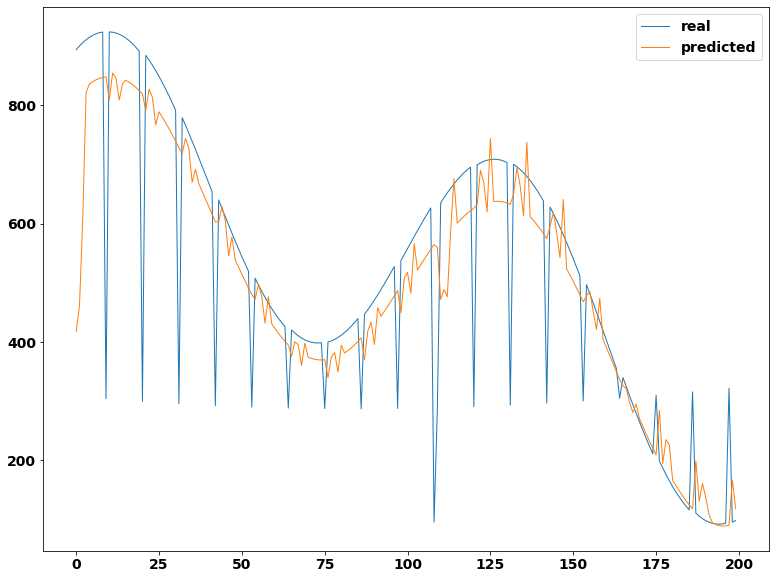

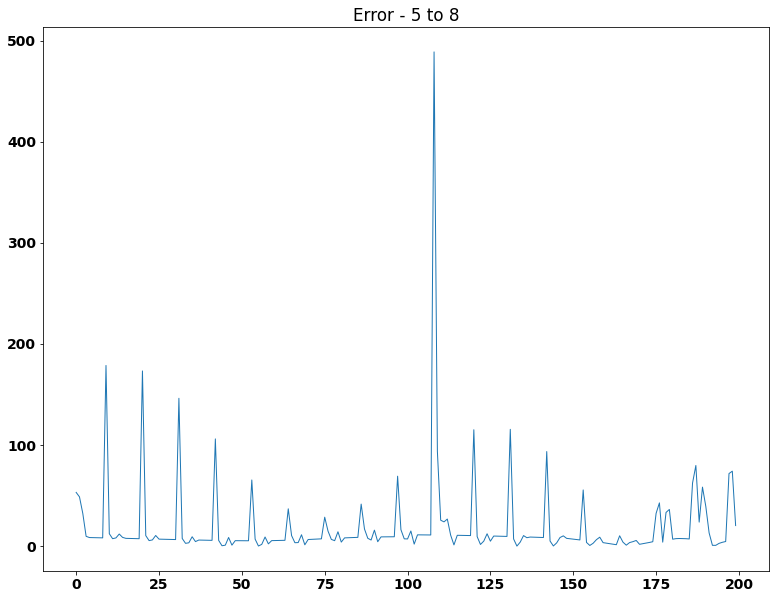

99% MAPE: 18.798296701719778
NODE 5 to 8 - TOTAL MAPE:  0.4475786663726603
NODE 5 to 8 - SECTION MAPE:  0.1929809961826048


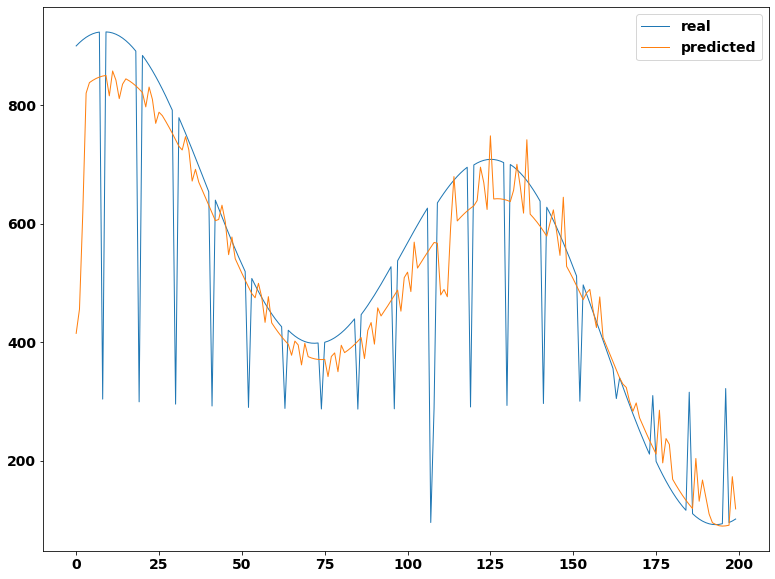

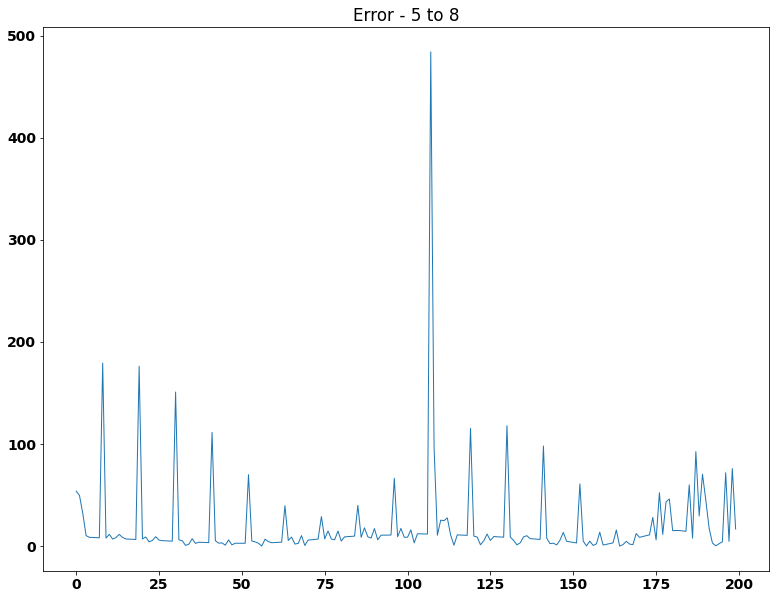

99% MAPE: 20.79090184348434
NODE 5 to 8 - TOTAL MAPE:  0.4685825231172632
NODE 5 to 8 - SECTION MAPE:  0.1997711728927724


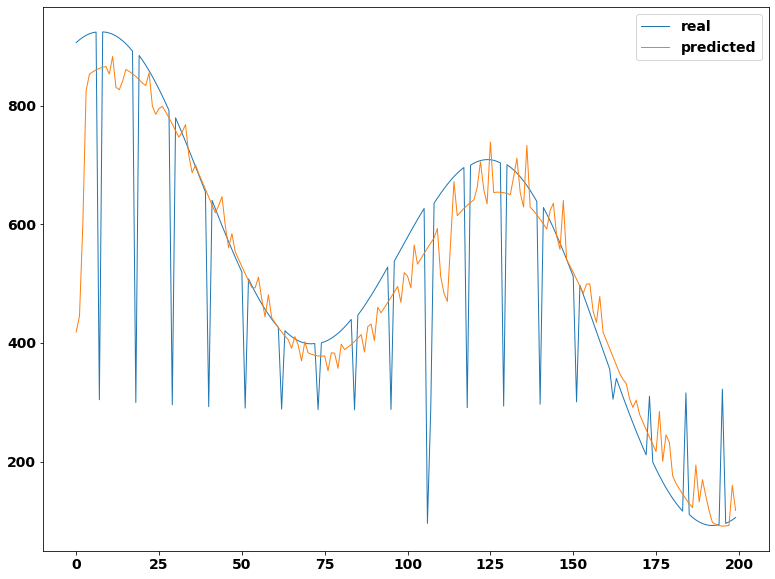

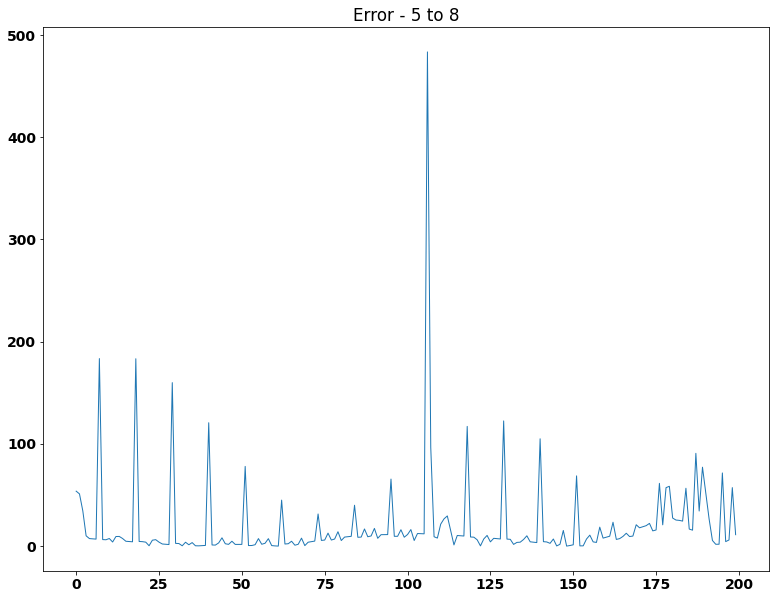

99% MAPE: 17.293831188851478
NODE 8 to 5 - TOTAL MAPE:  0.3985109944960986
NODE 8 to 5 - SECTION MAPE:  0.0761476414640407


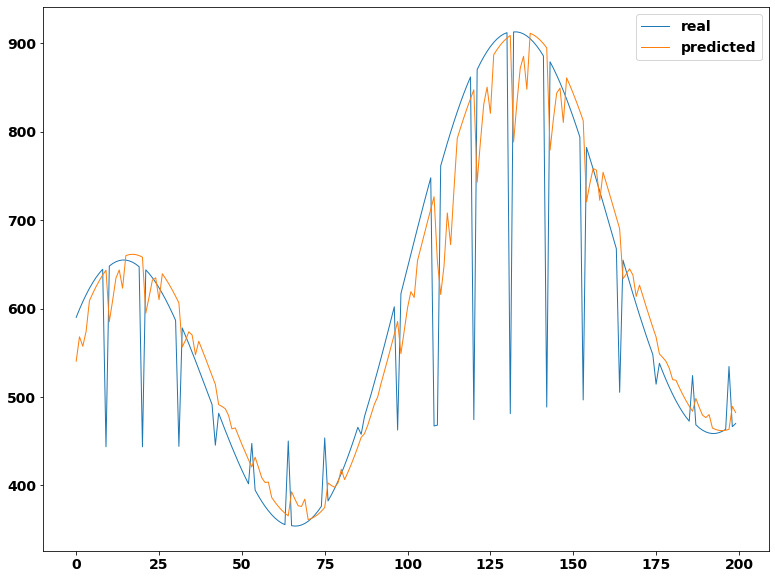

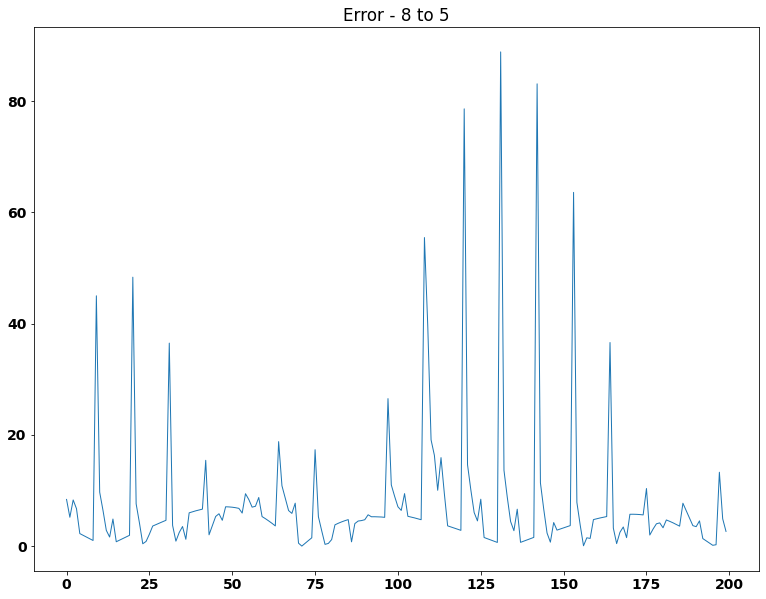

99% MAPE: 19.43487574830674
NODE 8 to 5 - TOTAL MAPE:  0.4022119803402499
NODE 8 to 5 - SECTION MAPE:  0.08636491580338877


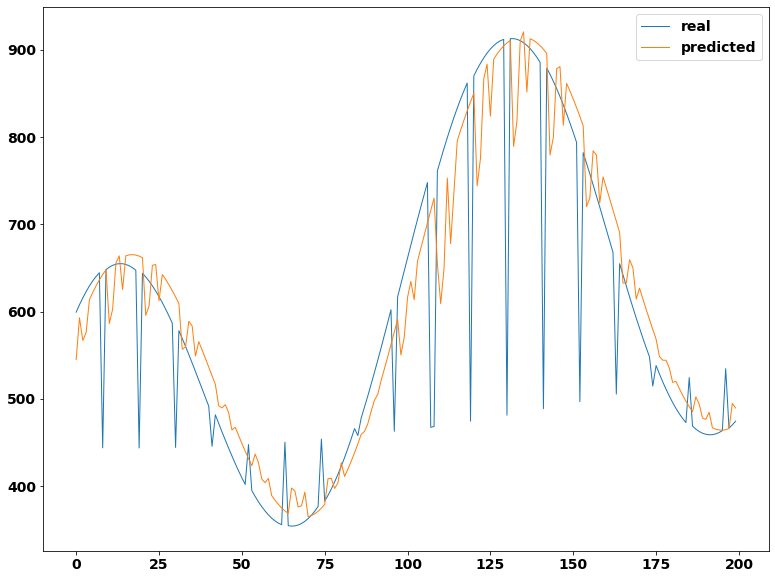

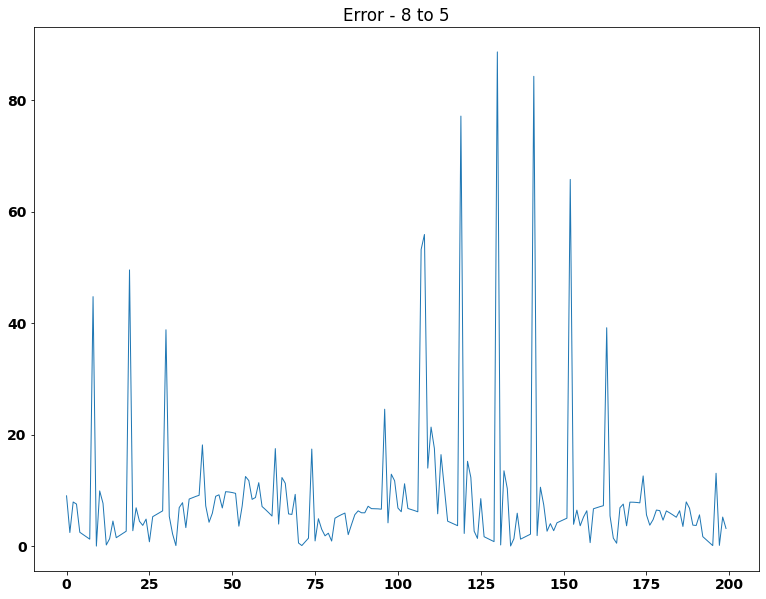

99% MAPE: 20.813342658838994
NODE 8 to 5 - TOTAL MAPE:  0.432825394449032
NODE 8 to 5 - SECTION MAPE:  0.0946155372578007


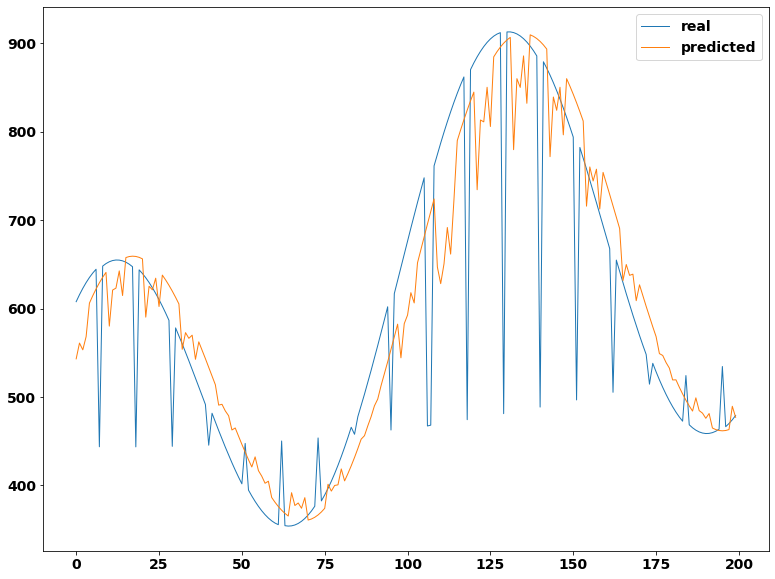

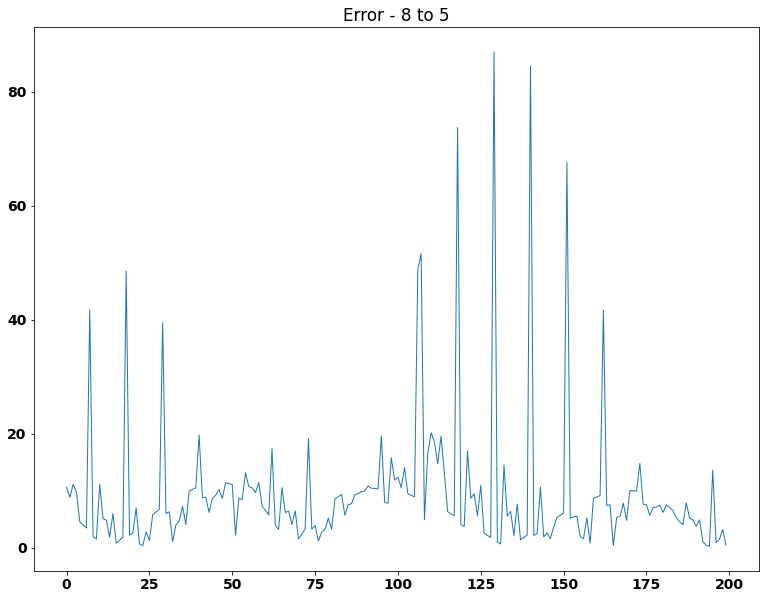

99% MAPE: 41.315606185943864
NODE 5 to 12 - TOTAL MAPE:  1.6910754469381786
NODE 5 to 12 - SECTION MAPE:  0.22743038232213952


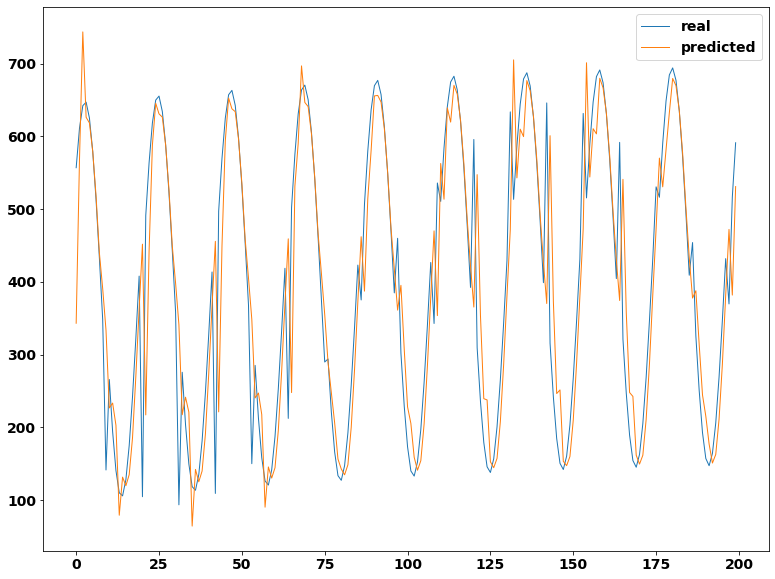

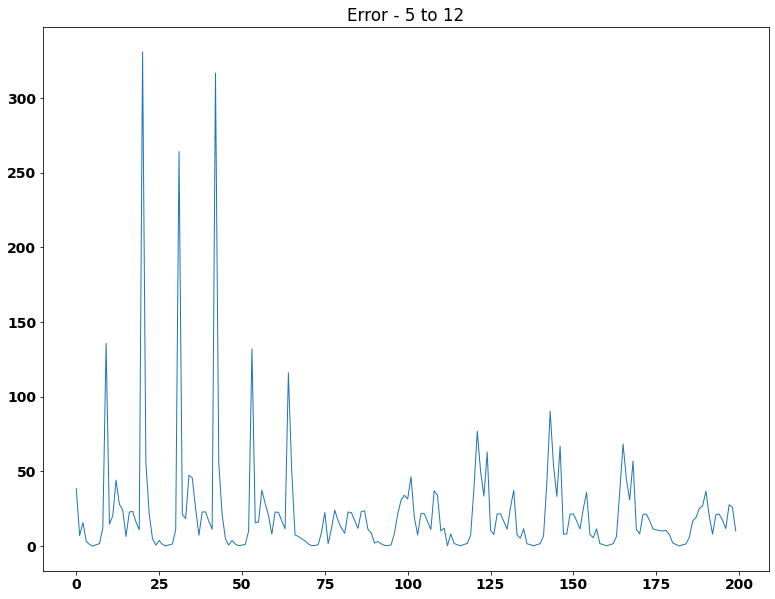

99% MAPE: 52.22501772150959
NODE 5 to 12 - TOTAL MAPE:  1.879887931109
NODE 5 to 12 - SECTION MAPE:  0.2831736098996639


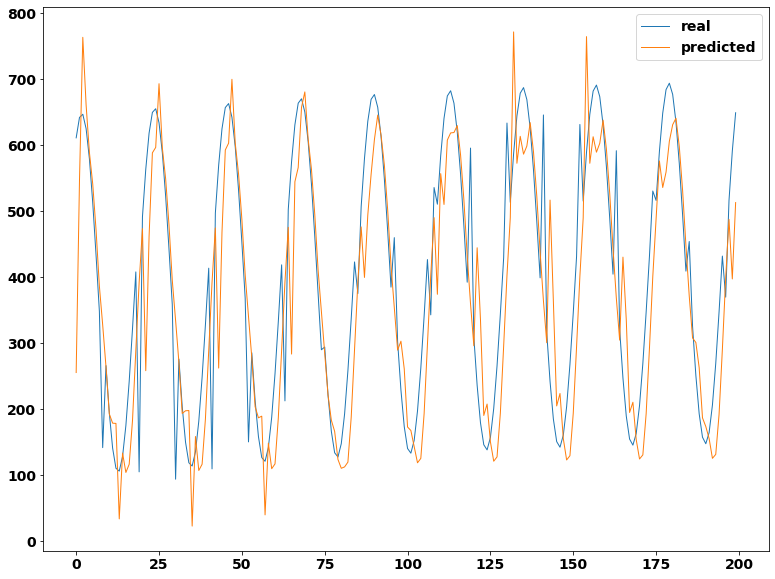

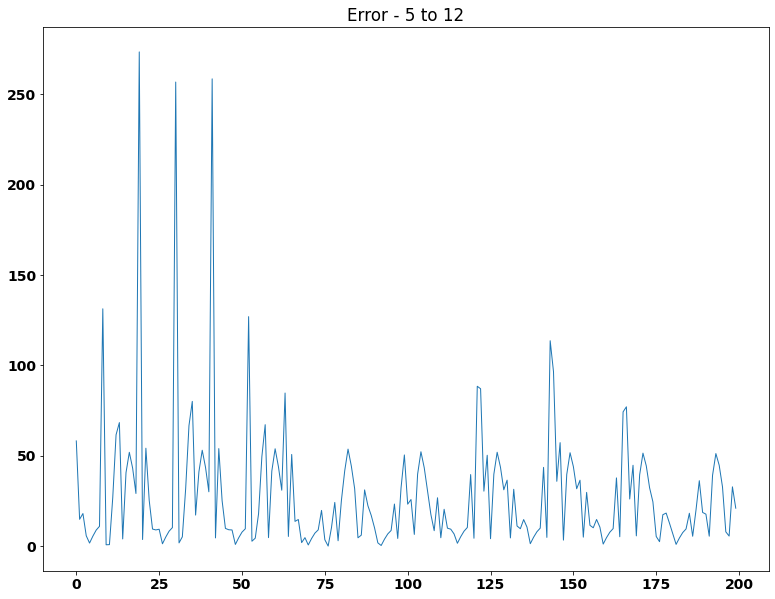

99% MAPE: 58.62018311429603
NODE 5 to 12 - TOTAL MAPE:  2.052729119236891
NODE 5 to 12 - SECTION MAPE:  0.32003259496600345


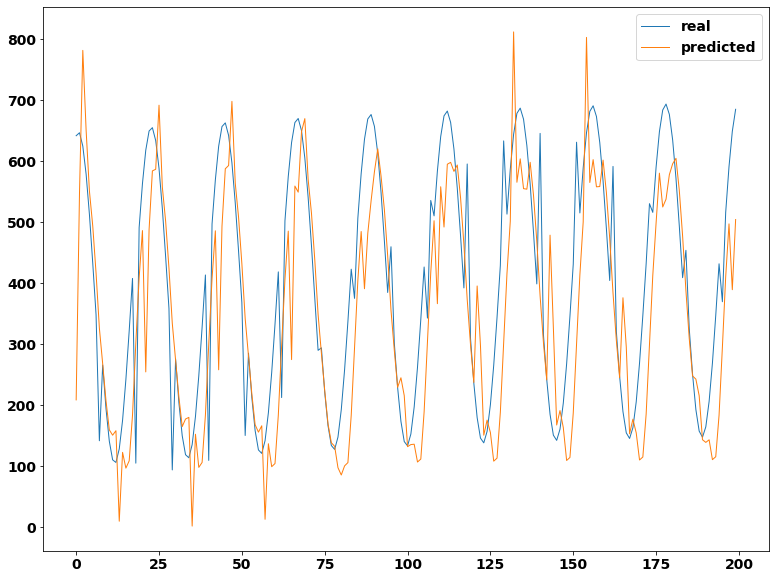

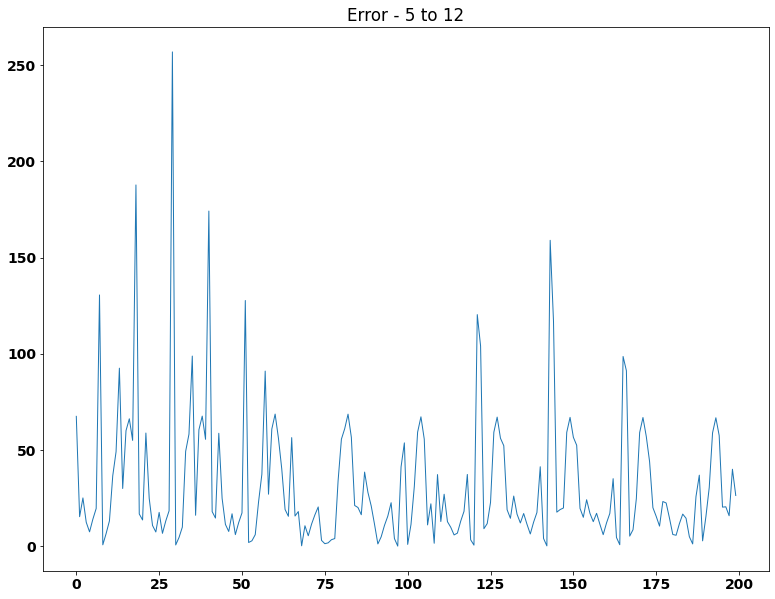

99% MAPE: 239.63881566641825
NODE 8 to 12 - TOTAL MAPE:  281.2314714876804
NODE 8 to 12 - SECTION MAPE:  0.7389490570278126


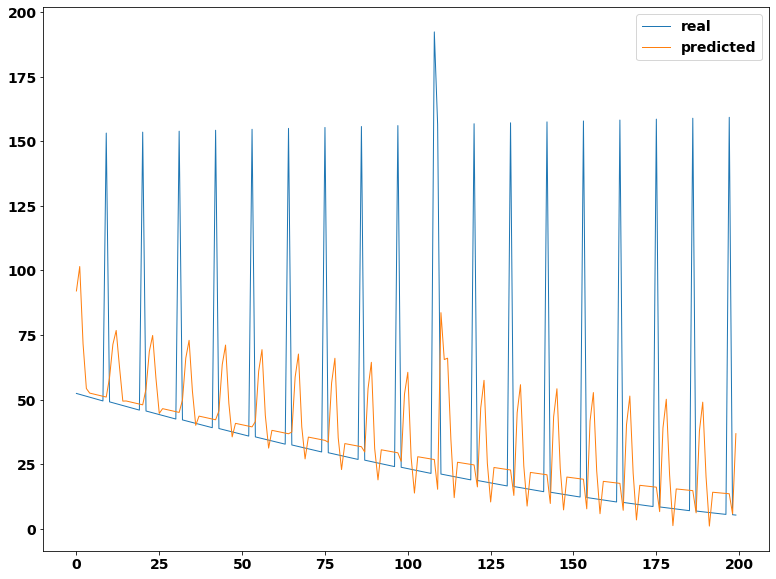

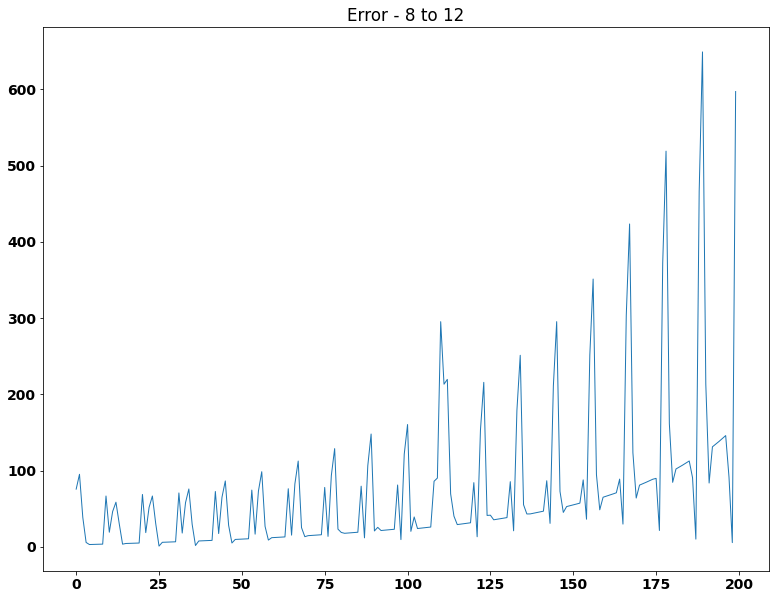

99% MAPE: 220.59342833008157
NODE 8 to 12 - TOTAL MAPE:  292.8620047379251
NODE 8 to 12 - SECTION MAPE:  0.7556623810131756


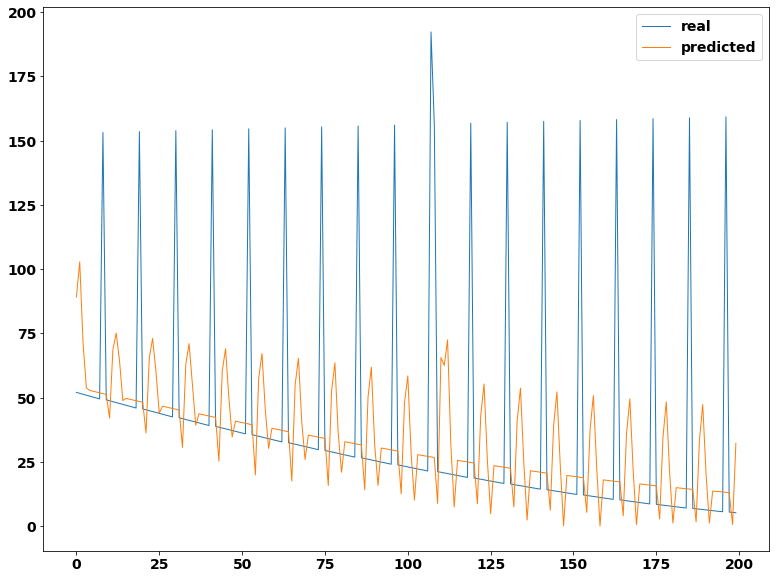

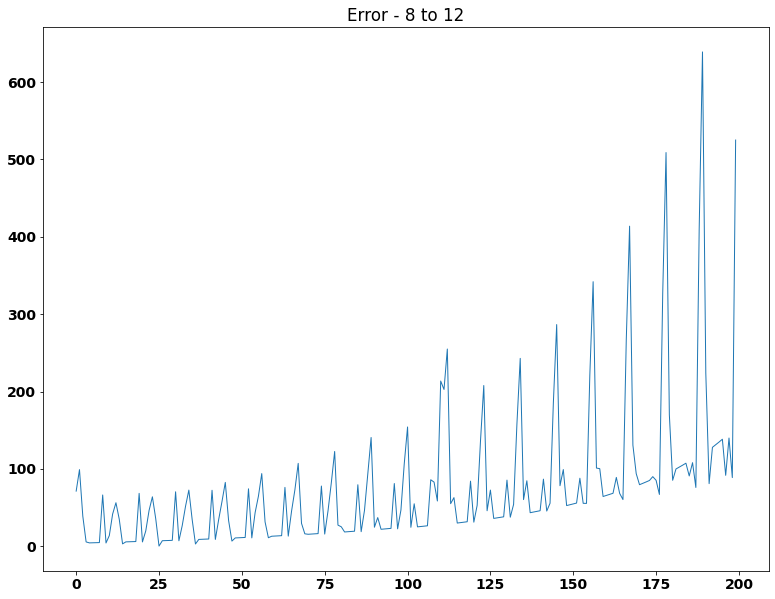

99% MAPE: 219.1657977705296
NODE 8 to 12 - TOTAL MAPE:  284.21334685465223
NODE 8 to 12 - SECTION MAPE:  0.7340080774834576


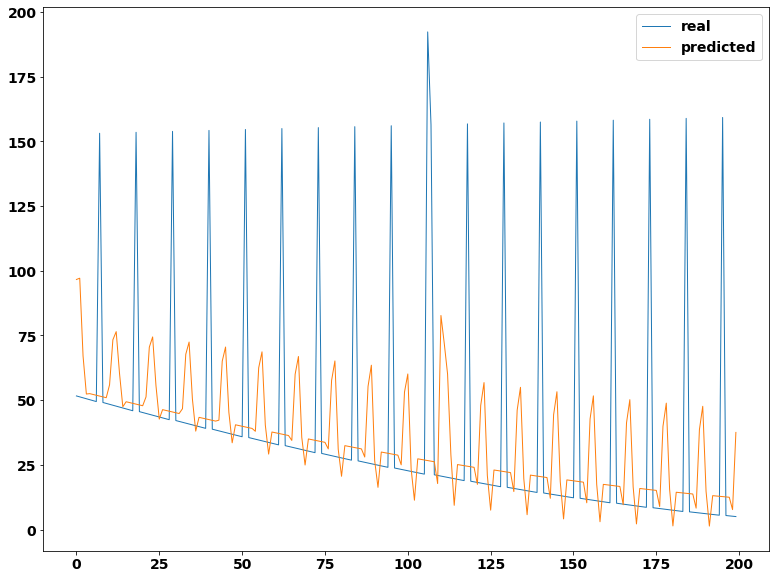

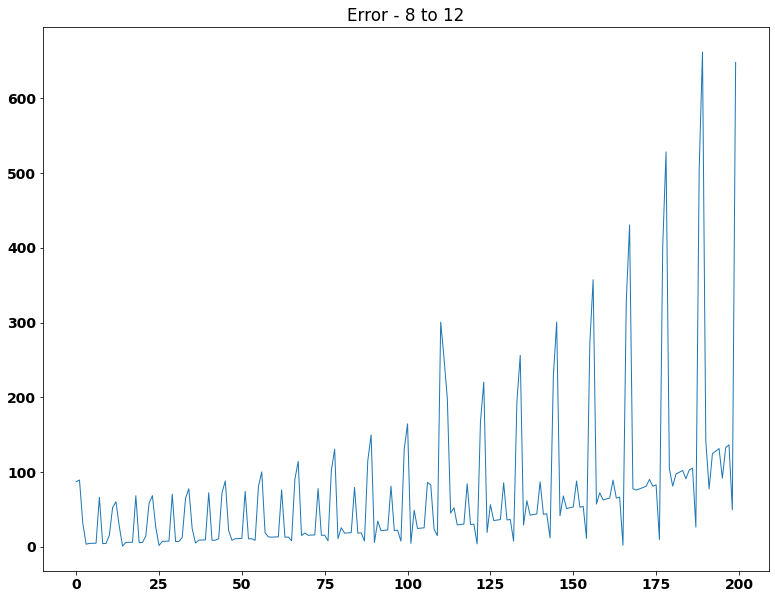

In [5]:
# analyze_all_experiments_singlestep('LSTM_5_in_1_out', (5900, 6100))
# analyze_all_experiments_singlestep('LSTM_CHUNK_5_in_1_out', (5900, 6100))
analyze_all_experiments_multistep('MLP_1_CHUNK_5_in_3_out', 3, (50000, 50200))

